In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]

In [24]:
def some_suspicious_distribution(N):
    return (np.pi / N) * np.max(np.random.standard_cauchy(N))

In [25]:
def frechet_distribution_density(x):
    return np.exp(- 1 / x) / (x ** 2)

In [44]:
def build_hist_with_density(N, threshold=20.0):
    x_values = np.linspace(1e-3, threshold, 500)
    y_values = np.vectorize(frechet_distribution_density)(x_values)
    plt.plot(x_values, y_values, color='red')

    samples = np.fromiter((some_suspicious_distribution(N) for _ in range(5000)), float)
    print(f"removing {np.size(samples[np.abs(samples) >= threshold])} outliers from sampling")
    samples = samples[np.abs(samples) < threshold]
    plt.hist(samples, bins=50, alpha=0.5, density=True)

    plt.show()

removing 513 outliers from sampling


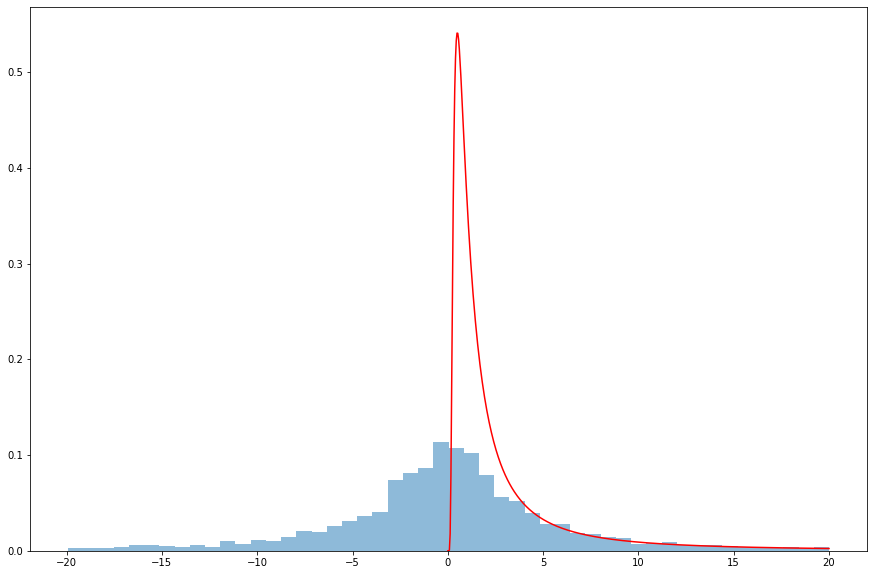

In [46]:
build_hist_with_density(N=1)

removing 245 outliers from sampling


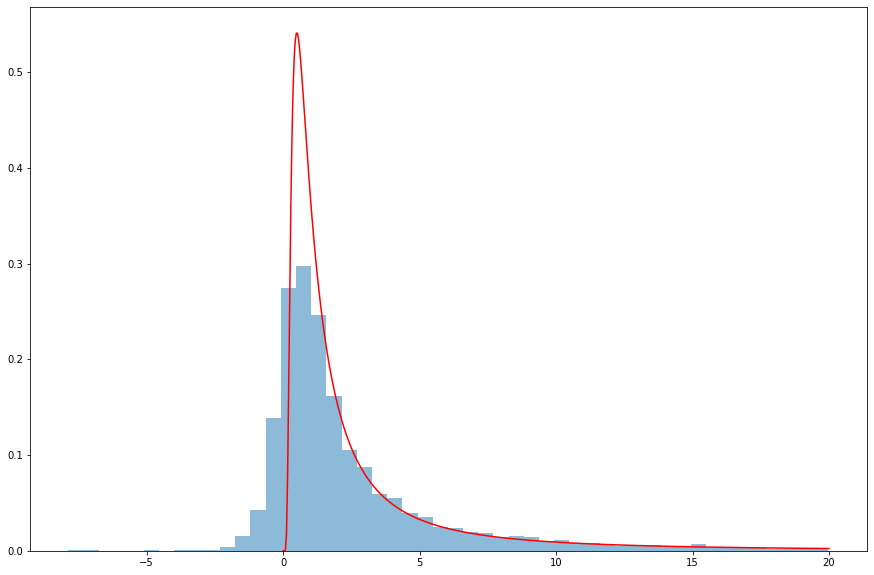

In [48]:
build_hist_with_density(N=3)

removing 238 outliers from sampling


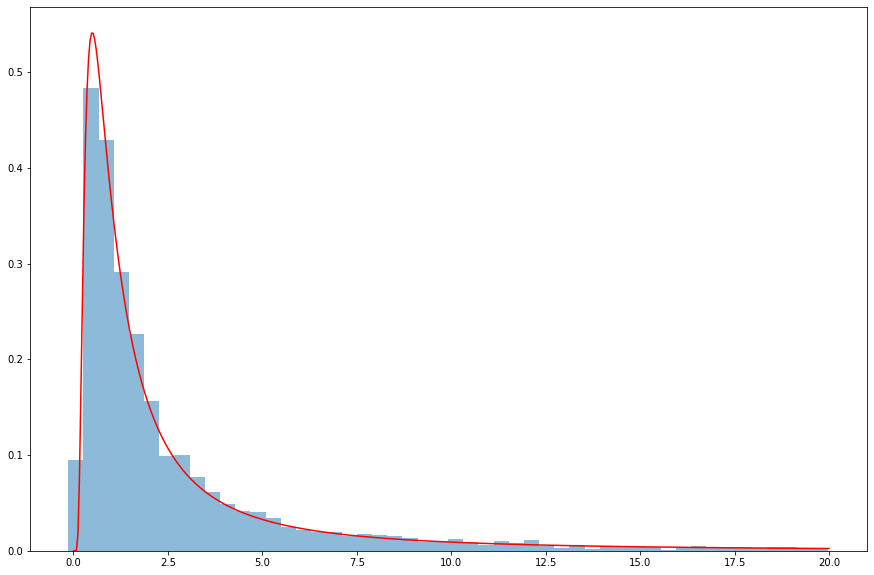

In [50]:
build_hist_with_density(N=10)